In [118]:
import numpy as np
path_n1 = 'myData\\1.txt'

n_data1 = np.loadtxt(path_n1)

path_n2 = 'myData\\2.txt'

n_data2 = np.loadtxt(path_n2)

path_p = 'myData\\p.txt'

p = np.loadtxt(path_p)

In [42]:
data = np.concatenate((n_data1, n_data2))

In [103]:
R = 8.31446261815324
from math import sqrt
delta_1 = 1.0 - sqrt(2.0)
delta_2 = 1.0 + sqrt(2.0)
M = 2
N = 200
T = 313.1
acentric_factor = [0.011, 0.484]
Tc = [190.55, 617.8]
Pc = [45.95e+5, 21.1e+5]
k_mix = [0.0, 0.045999999999999999, 0.045999999999999999, 0.0]
a_i = [0.19768079782109826, 9.7339935038307370]
b_i = [2.6824844891615227e-05, 0.00018939967555806471]
n_sum = np.zeros((N))
    
for i in range(N):
    for j in range(M):
        n_sum[i] += data[j * N + i]
a_ij = np.zeros((M*M))
for i in range(M):
    for j in range(M):
        a_ij[i * M + j] = sqrt(a_i[i] * a_i[j]) * (1.0 - k_mix[i * M + j])
b = np.zeros((N))
   
for i in range(N):
    for j in range(M):
        b[i] += data[j * N + i] / n_sum[i] * b_i[j]
a = np.zeros((N))
         
for i in range(N):
    for j in range(M):
        for k in range(M):
            a[i] += data[j * N + i] / n_sum[i] * data[k * N + i] / n_sum[i] * a_ij[j * M + k]
a_sum = np.zeros((N*M))

for i in range(N):
    for j in range(M):
        for k in range(M):
            a_sum[j * N + i] += data[k * N + i] * a_ij[j * M + k] + data[k * N + i] * a_ij[k * M + j]
Vm = np.zeros((N))
    
for i in range(N):
    for j in range(M):
        Vm[i] += data[j * N + i]
    Vm[i] = 1.0 / Vm[i]
pres = np.zeros((N))
    
for i in range(N):
    pres[i] = R * T / (Vm[i] - b[i]) - a[i] / (Vm[i] * Vm[i] + 2.0 * b[i] * Vm[i] - b[i] * b[i])

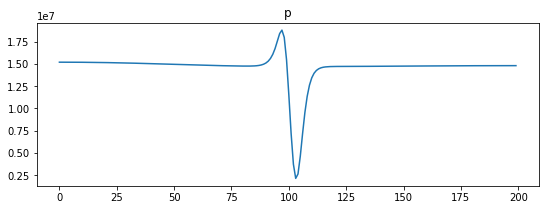

In [127]:
plt.figure(figsize=(9, 3))
plt.plot(pres)
plt.title('p')
plt.show()

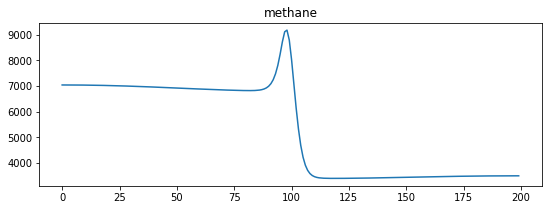

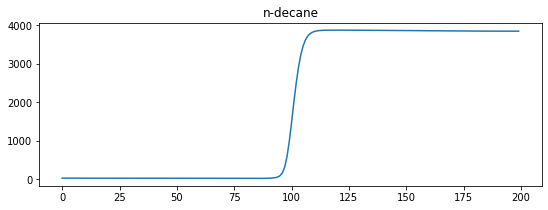

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
plt.plot(n_data1)
plt.title('methane')
plt.show()
plt.figure(figsize=(9, 3))
plt.title('n-decane')
plt.plot(n_data2)
plt.show()